In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import deepmatcher as dm
from utils.intermediate_layer_extraction import return_layer_input
from utils.ri_calculator import computeRi
from utils.distance_measures import nearestNeighborsOnAttribute
import pandas as pd
import torch

In [4]:
attributes = ['Song_Name','Artist_Name','Album_Name','Genre','Price','CopyRight','Time','Released']

## Hybrid

### Datasets creation

In [5]:
import torch

In [6]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.load_state('../../models/itunes_amazon_hybrid.pth')
hybrid_model = hybrid_model.cuda()

In [9]:
negatives = return_layer_input(hybrid_model,hybrid_model.classifier,'../../Structured/itunes-amazon','negatives')

In [10]:
positives = return_layer_input(hybrid_model,hybrid_model.classifier,'../../Structured/itunes-amazon','positives')


Reading and processing data from "../../Structured/itunes-amazon/positives.csv"
0% [############################# ] 100% | ETA: 00:00:00
Building vocabulary
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00

Computing principal components
0% [#] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


### Negative sample analysis

In [ ]:
negatives_ri,neg_rinorms_df= computeRi(hybrid_model.classifier,
                                                    attributes,negatives,1)


 44%|████▍     | 179/407 [00:42<00:58,  3.91it/s]

In [ ]:
rankings = neg_rinorms_df.sum()
maxrank = max(rankings)
(rankings/maxrank).plot.bar()

In [ ]:
torch.save(negatives_ri,'experiments/results/neg_ri_hybrid.pt')

## Positive samples analisys

In [86]:
pos_ri_hybrid,pos_rinorms_df = computeRi(hybrid_model.classifier,attributes,
                                              positives,0)


100%|██████████| 132/132 [00:50<00:00,  2.61it/s]


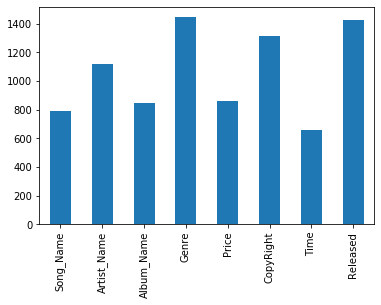

In [94]:
pos_rinorms_df.sum().plot.bar()

In [ ]:
torch.save(pos_ri_hybrid,'experiments/results/pos_ri_hybrid.csv')

## Nearest neighbors hybrid

In [ ]:
positives_nn_hybrid = calculate_nearest_neighbors_onAttributes(positives,pos_ri_hybrid,
                                                       negatives,attributes,attribute_len_hybrid,
                                                               min_similarity=0)

In [ ]:
negatives_nn_hybrid = calculate_nearest_neighbors_onAttributes(negatives,negatives_ri,
                                                        positives,attributes,attribute_len_hybrid,
                                                               min_similarity=0)

In [ ]:
positives_nn_hybrid.to_csv('experiments/results/positivesNNHybridWithoutfilter.csv',index=False)
negatives_nn_hybrid.to_csv('experiments/results/negativesNNhybridWithoutfilter.csv',index=False)

In [ ]:
positives_nn_hybrid['Price'].value_counts()

In [ ]:
negatives = pd.read_csv('../../Structured/itunes-amazon/negatives.csv')
positives = pd.read_csv('../../Structured/itunes-amazon/positives.csv')